In [253]:
# import numpy
import numpy as np

# import pandas
import pandas as pd

# import matplotlib.pyplot
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns

# to suppress the warnings
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing 
1.Missing values
a. Standared missing values
b. Non -Standard missing values
2. Handling Non numeric data 
(One Hot encoding,Label encoding,Ordinal encoding)
3. Normalization and Transformations
4.Outliers  based on Boxplot,IQR,Zscore,scatter plot
5. Feature engineering 
6.Train test split 

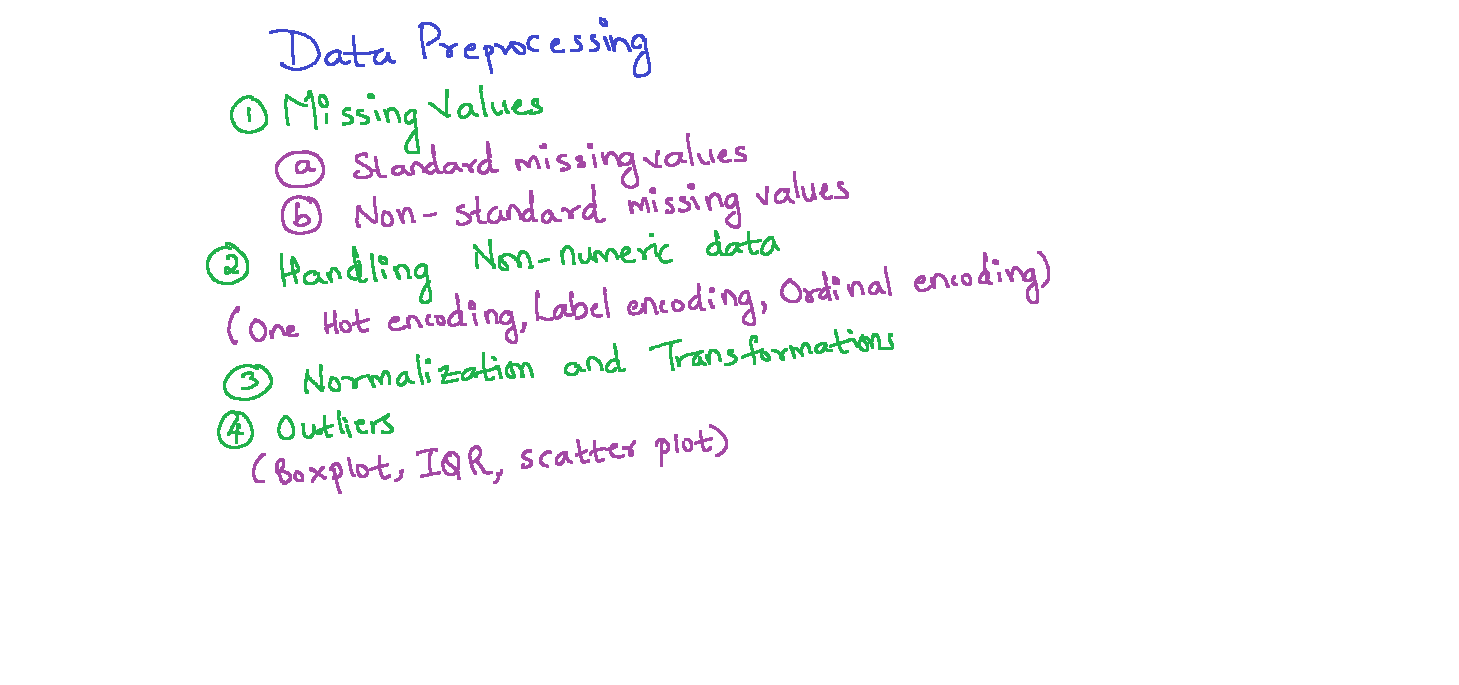

In [254]:
from IPython.display import Image
r=Image(filename='dp.png')
display(r)

In [255]:
# load the csv file
df = pd.read_csv('CarPrice_Assignment.csv')

# display the first five observations
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950
4,5,2,audi 100ls,gas,std,NaN,sedan,4wd,front,99.4,...,136,mpfi,?,3.4,8.0,NaN,5500.0,18,22,17450


In [256]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio            object
stroke               object
compressionratio    float64
horsepower          float64
peakrpm             float64
citympg               int64
highwaympg            int64
price                object
dtype: object

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        200 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [258]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,103.567164,5124.378109,25.219512,30.751220
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,39.272850,475.870504,6.542142,6.886443
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,288.000000,6600.000000,49.000000,54.000000


In [259]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            39
stroke               38
compressionratio     32
horsepower           58
peakrpm              23
citympg              29
highwaympg           30
price               188
dtype: int64

In [260]:
df['boreratio'].unique()

array(['3.47', '2.68', '3.19', '?', '3.13', '3.5', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.6', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', '3.33', '3.39', '3.76', '3.58', '3.46', '3.8',
       '3.78', '3.17', '3.35', '3.59', '2.99', '3.7', '3.61', '3.94',
       '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'], dtype=object)

In [214]:
#Datatype conversion
#error will come as converting to object 

In [215]:
df[['horsepower','peakrpm','stroke','boreratio']]=df[['horsepower','peakrpm','stroke','boreratio']].astype("float")

ValueError: could not convert string to float: '?'

In [216]:
#Missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        200 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [217]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          5
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          4
peakrpm             4
citympg             0
highwaympg          0
price               0
dtype: int64

In [218]:
df['boreratio'].value_counts()


3.62    23
3.19    19
3.15    14
3.03    12
2.97    11
3.46     9
3.43     8
3.31     8
3.78     8
2.91     7
3.27     7
3.58     6
3.33     6
3.54     6
3.05     6
3.39     6
3.7      5
3.01     5
?        4
3.35     4
3.59     3
3.17     3
3.74     3
3.24     2
3.94     2
3.5      2
3.47     2
3.8      2
3.63     2
3.34     1
2.68     1
2.99     1
3.61     1
3.6      1
2.92     1
2.54     1
3.13     1
3.76     1
3.08     1
Name: boreratio, dtype: int64

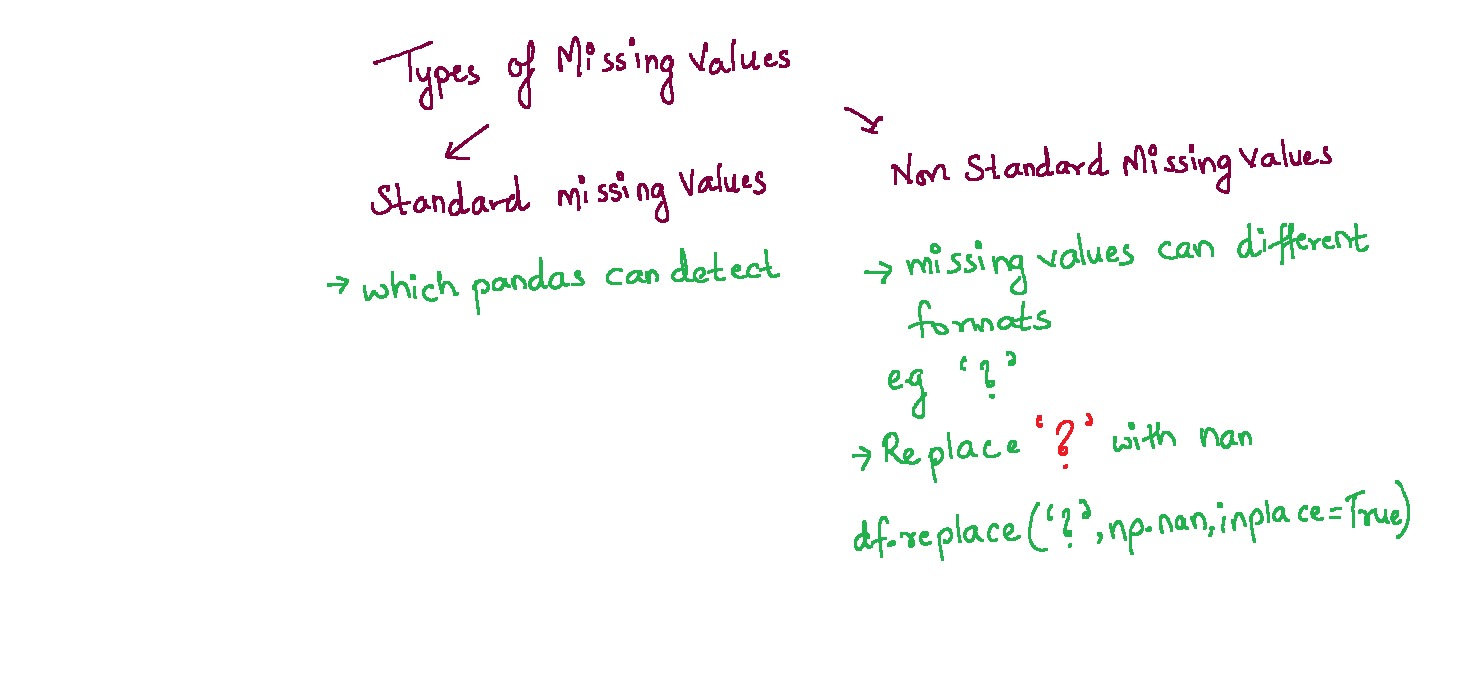

In [219]:
from IPython.display import Image
r=Image(filename='types_missing.png')
display(r)

In [264]:
#replace ? with np.nan
df.replace('?',np.nan,inplace=True)

In [221]:
#Change the datatype to float
df[['horsepower','peakrpm','stroke','boreratio','price']]=df[['horsepower','peakrpm','stroke','boreratio','price']].astype("float")

In [222]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          5
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           4
stroke              3
compressionratio    0
horsepower          4
peakrpm             4
citympg             0
highwaympg          0
price               2
dtype: int64

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        200 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [224]:
#df['doornumber'] is object column
df['doornumber'].value_counts()

four    113
two      87
Name: doornumber, dtype: int64

In [225]:
df['doornumber'].mode()

0    four
dtype: object

In [226]:
df['doornumber'].replace(np.nan,"four",inplace=True)

In [227]:
# boreratio         201 non-null    float64

In [228]:
avgbore=df['boreratio'].astype('float').mean()

In [229]:
avgbore

3.3341293532338323

In [230]:
df['boreratio'].replace(np.nan,avgbore,inplace=True)

In [231]:
#stroke,horsepower,peakrpm,price

In [232]:
df['stroke'].value_counts()

3.400    20
3.030    14
3.150    14
3.230    14
3.390    13
2.640    11
3.350     9
3.290     9
3.460     8
3.070     6
3.270     6
3.580     6
3.500     6
3.110     6
3.520     5
3.640     5
3.190     5
3.410     5
3.860     4
3.540     4
3.255     4
3.470     4
2.900     3
3.900     3
3.080     2
3.100     2
2.190     2
2.800     2
2.680     2
2.360     1
3.160     1
2.070     1
3.210     1
3.120     1
2.760     1
4.170     1
2.870     1
Name: stroke, dtype: int64

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [234]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              3
compressionratio    0
horsepower          4
peakrpm             4
citympg             0
highwaympg          0
price               2
dtype: int64

In [235]:
avghorsepower=df['horsepower'].astype('float').mean()
df['horsepower'].replace(np.nan,avghorsepower,inplace=True)

In [236]:
avgpeakrpm=df['peakrpm'].astype('float').mean()
df['peakrpm'].replace(np.nan,avgpeakrpm,inplace=True)

In [265]:
avgprice=df['price'].astype('float').mean()
df['price'].replace(np.nan,avgprice,inplace=True)

In [238]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              3
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [239]:
avgprice=df['stroke'].astype('float').mean()
df['stroke'].replace(np.nan,avgprice,inplace=True)

In [240]:
avgprice=df['boreratio'].astype('float').mean()
df['boreratio'].replace(np.nan,avgprice,inplace=True)

In [241]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Handling non numeric data 
## There are many ways to encode the categorical variables:
<font color=#FF0000>**
  1.N-1 Dummy encoding <br>
  2.One-hot encoding <br>
  3.Label encoding <br>
  4.Ordinal encoding <br>
  5.Frequency encoding <br>
   **</font>

<font color=#FF0000>**#DataPreprocessing 
1. imputing --filling nan values,  
   Cleaning part
2. Outlier ---
3.transformation
   Log,exponential 
4.Scale (Standard scaler,Minmaxscaler)
*</font>

In [243]:
#Label encoding --fueltype

In [244]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [245]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['encoded_fueltype']=labelencoder.fit_transform(df.fueltype)

In [246]:
df['encoded_fueltype']

0      1
1      1
2      1
3      1
4      1
      ..
200    1
201    1
202    1
203    0
204    1
Name: encoded_fueltype, Length: 205, dtype: int32

In [247]:
#Outliers
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower          float64
peakrpm             float64
citympg               int64
highwaympg            int64
price               float64
encoded_fueltype      int32
dtype: object

In [271]:
#ifdatatype not changed
df[['price']]=df[['price']].astype('int')
df[['price']]

,price
0,13495
1,16500
2,16500
3,13950
4,17450
...,...
200,16845
201,19045
202,21485
203,22470


<AxesSubplot:xlabel='price'>

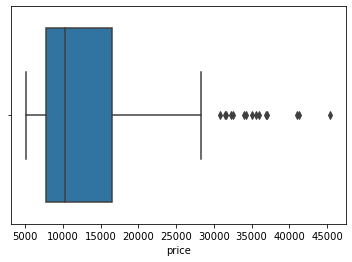

In [272]:
sns.boxplot(df.price)

<AxesSubplot:xlabel='price', ylabel='Count'>

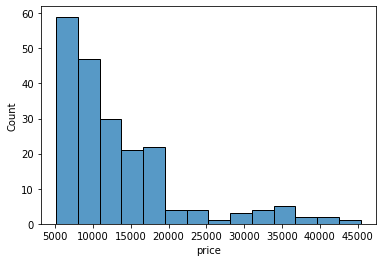

In [273]:
sns.histplot(df.price)

In [250]:
#outliers above 30000

In [274]:
#z-score 
from scipy import stats
z=np.abs(stats.zscore(df['price']))
print(z)

0      0.028119
1      0.406705
2      0.406705
3      0.085442
4      0.526392
         ...   
200    0.450171
201    0.727339
202    1.034744
203    1.158840
204    1.178367
Name: price, Length: 205, dtype: float64


In [180]:
print(np.where (z>3))

(array([16, 73, 74], dtype=int64),)


In [201]:
print(np.where (z<3))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 1

In [181]:
print(z[16])

3.5330346724210675


In [195]:
df_out_zscore=df[(z<3)]

In [196]:
df_out_zscore.shape

(202, 27)